# **Kaggle HW5: [Tamia Ouch]**

**Remember to write your team name above, which MUST match your team name on Kaggle!!** Assignments without a team name will receive a 0/40 on the "accuracy on test data" component of this assignment's grade.

### **Load the Data**

In [2]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_train.csv',
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_test.csv',
          'edx_test.csv')

### **Sample Code: Random Classifier**

**NOTE**: This classifier **DOES NOT** count as one of the 2 required for this assignment! It is merely here to illstrate how to submit your predictions.

See the Kaggle assignment (Data tab) for a description of each column in the dataset. You are creating a classifier to predict whether or not a student will get certified, stored in the `"certified"` column.

In [3]:
import pandas as pd
from sklearn.dummy import DummyClassifier

target = "certified" # target column

# This classifier returns labels sampled uniformly at random
df_train = pd.read_csv('edx_train.csv')
dummy_model = DummyClassifier(strategy="uniform")
dummy_model.fit(df_train.drop(target, axis=1), df_train[target])

DummyClassifier(strategy='uniform')

The code below generates predictions on the test set, and outputs the predictions into a CSV file.

In [4]:
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')
predictions = dummy_model.predict(df_test)

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

### **[5 Pts] Model Comparison**

**Instructions**: Run at least 2 different classification models. The classification models we have learned in class are: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html). For each model, try at least 2 different hyperparameter settings.

Then, make one or more visualizations that let you compare the models you trained. Sample visualizations you can make include confusion matrices, or graphs of train and validation accuracy/error. See past section and homework code for how to make these visualizations.

Logistic Regression (100 iter) Accuracy: 0.940068493150685
Logistic Regression (500 iter) Accuracy: 0.9417808219178082
Random Forest (50 trees, max_depth 5) Accuracy: 0.964041095890411
Random Forest (100 trees, max_depth 10) Accuracy: 0.968607305936073


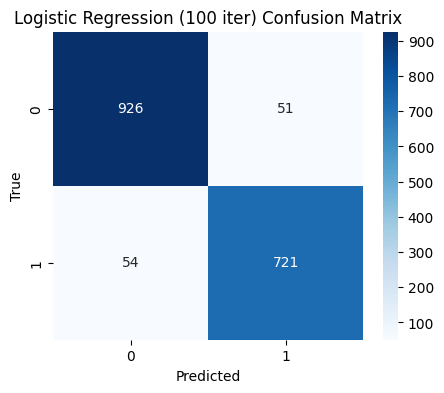

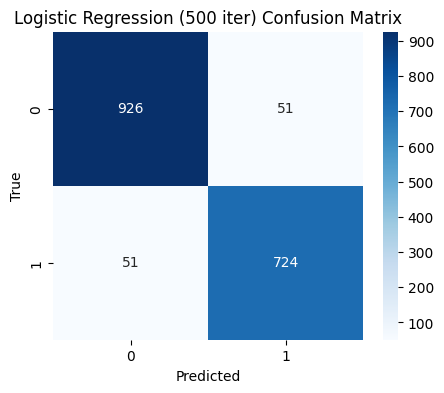

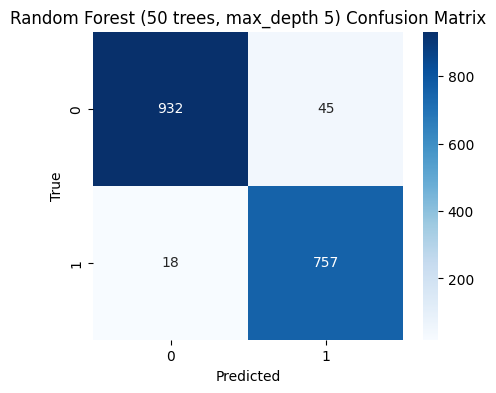

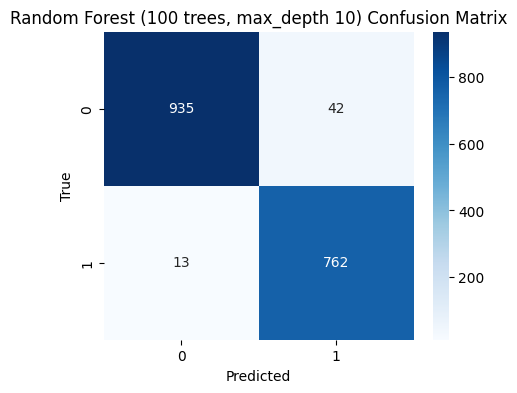

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix

#load data
df_train = pd.read_csv('edx_train.csv')
df_test = pd.read_csv('edx_test.csv')

#feature columns
target = "certified"
features = [
    "viewed", "explored", "nevents", "ndays_act", "nplay_video", "nchapters", "nforum_posts"
]


#apply imputer to training and test set
imputer = SimpleImputer(strategy = "mean")

df_train[features] = imputer.fit_transform(df_train[features])
df_test[features] = imputer.transform(df_test[features])

#split training data
X = df_train[features]
y = df_train[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(df_test[features])

#train and fit logistic regression models with different iterations
logreg1 = LogisticRegression(C=0.1, max_iter=100)
logreg2 = LogisticRegression(C=10, max_iter=500)
logreg1.fit(X_train, y_train)
logreg2.fit(X_train, y_train)

predict_logreg1 = logreg1.predict(X_val)
predict_logreg2 = logreg2.predict(X_val)

#train and fit two random forest models with different depths
randomf1 = RandomForestClassifier(n_estimators = 50, max_depth=5, random_state=42)
randomf2 = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=42)

randomf1.fit(X_train, y_train)
randomf2.fit(X_train, y_train)

predict_randomf1 = randomf1.predict(X_val)
predict_randomf2 = randomf2.predict(X_val)

#view the accuracy score of the 4 models
print("Logistic Regression (100 iter)" + " Accuracy:", accuracy_score(y_val, predict_logreg1))
print("Logistic Regression (500 iter)" + " Accuracy:", accuracy_score(y_val, predict_logreg2))
print("Random Forest (50 trees, max_depth 5)" + " Accuracy:", accuracy_score(y_val, predict_randomf1))
print("Random Forest (100 trees, max_depth 10)" + " Accuracy:", accuracy_score(y_val, predict_randomf2))

#plot the 4 models
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_val, predict_logreg1, "Logistic Regression (100 iter) Confusion Matrix")
plot_confusion_matrix(y_val, predict_logreg2, "Logistic Regression (500 iter) Confusion Matrix")
plot_confusion_matrix(y_val, predict_randomf1, "Random Forest (50 trees, max_depth 5) Confusion Matrix")
plot_confusion_matrix(y_val, predict_randomf2, "Random Forest (100 trees, max_depth 10) Confusion Matrix")

#choose the model with best accuracy
final_model = randomf2
predictions = final_model.predict(X_test)

#save data to csv
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)



**Remember to submit your submissions CSV FILE on Kaggle!** 40 pts come from your accuracy on the private test data.

See screenshots below for how to upload submissions to Kaggle (ingore summer and homework number in pictures). This was also covered in your section on Thursday 2/20.

Step 1: See the list of files on Colab

![See Colab Files](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/1_colab_see_files.jpg)

Step 2: Download `submission.csv`

![Download Colab File](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/2_colab_download_file.jpg)

Step 3: Join the Kaggle competition.

![Join the Kaggle Competition](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/3_kaggle_join_competition.jpg)

Step 4: Enusre your team name in Kaggle matches the one at the top of this notebook!

![Check Team Name](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/4_kaggle_team_name.jpg)

Step 5: Upload `submission.csv` to Kaggle

![Upload submission.csv](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/6_kaggle_upload_submission.jpg)



### **Discussion**



#### **[7 Pts] Training the Models**

**Instructions**: Discuss what models you tried, and what you did to improve your initial predictions. Discuss what hyperparameters you tried, and which hyperparameters seemed important for your final model. Finally, discuss what you are inferring from the above visualiation(s).

I tried logistic regression and random forest tree models because that is what I am most comfortable with. For the logistic regression models the hyperparameters I changed was the iterations and the regularization strength, both of which did not significantly change the difference between the models. For the random forest tree models I changed the number of trees, and the max depth. I noticed that with the more depth and amount of trees, the more accurate the confusion matrix. I did go with the second random forest tree model because it had the highest accuracy score.

#### **[3 Pts] Feature Selection**

**Instructions**: Discuss what features you used and whether you did some transformations on them. What features seemed important for your final model?

In terms of features I used, viewed, explored, nevents, ndays_act, n_playvideo, nchapters, and nforum posts. I did normalize them and removed the feature "grade" because it continued to bring up errors, im assuming because of missing values due to the fact my data was loaded properly. It was hard to decide what feature seemed important to my model because I started with all of them besides the ones that were user-provided like gender or highest education received. I also did not include the start date or times, or the staff and the students locations. These choices were made merely because the user ones could have provided inaccuracies due to the fact it relies on their input, and the administrative ones I decided to remove were based on the fact I did not deem them as important and it would make my model take longer to run. I did however go through the ones I kept and run the model missing one feature each time, and the accuracy lowered each time so I decided to keep them all.

#### **[5 Pts] Ethical Implications**

**Instructions**: Consider and discuss the ethical implications of using the model you trained. Imagine you were hired to work as a data scientist for an online education platform (exciting, right?). They want to use your model to predict which students they should tailor their course material towards so they can maximize their profits. Their idea is to use the model to help predict which student groups (i.e. from specific countries or certain educational backgrounds) would make them the most money by getting the most participants to complete their paid certificate program. Are there any ethical considerations we should think about before acting on that plan?

There are many ethnical considerations to think about before acting on this plan. For example we talked in class about historical bias and depending on the dataset, historical bias can implant our model with unethical decisions for the class complex. We should also keep in mind transparency and consent about whether or not the students' understand their data is being used to tailor the course. This plan can also impact the learning motivations of the students, with it being tailored towards a specifc grouping of epople that maximize profits, it can make it more difficult for students that the course is not tailored too and we could possibly have extra support resources for them.